#EN3150 Assignment 03: Simple convolutional neural network to perform classification.



##1 .CNN for image classification

### Mount the google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Dataset

In [2]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Progress bar to monitor the copying process

# Define the base directory and the new directories for train, validation, and test sets
base_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/'
train_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/train'
validation_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/validation'
test_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lists to hold image data and labels
image_paths = []
labels = []

# Load images from each folder (H1, H2, H3, H5, H6)
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                # Construct full image path
                image_path = os.path.join(folder_path, filename)
                image_paths.append(image_path)
                labels.append(folder)  # Assign label based on folder name

# Convert labels to a NumPy array
labels = np.array(labels)

### Split the Dataset

In [3]:
# Split data: 60% train, 20% validation, 20% test
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.4, random_state=42, stratify=labels
)
validation_paths, test_paths, validation_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

# Print the sizes of the splits
print(f'Training set: {len(train_paths)} images')
print(f'Validation set: {len(validation_paths)} images')
print(f'Test set: {len(test_paths)} images')

# Function to copy images to the relevant directories (train, validation, test)
def copy_images_to_directories(image_paths, labels, split_dir):
    # Create subdirectories for each class in the split directory (train, validation, test)
    for class_name in np.unique(labels):
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    # Use tqdm to show progress while copying files
    for image_path, label in tqdm(zip(image_paths, labels), total=len(image_paths)):
        # Determine the class directory for the label
        class_dir = os.path.join(split_dir, label)
        # Copy the image to the appropriate class directory
        shutil.copy(image_path, class_dir)

# Copy images to the train, validation, and test directories
print("Copying images to the train directory...")
copy_images_to_directories(train_paths, train_labels, train_dir)

print("Copying images to the validation directory...")
copy_images_to_directories(validation_paths, validation_labels, validation_dir)

print("Copying images to the test directory...")
copy_images_to_directories(test_paths, test_labels, test_dir)

print("Images have been copied to train, validation, and test directories.")


Training set: 5468 images
Validation set: 1823 images
Test set: 1823 images
Copying images to the train directory...


100%|██████████| 5468/5468 [17:41<00:00,  5.15it/s]


Copying images to the validation directory...


100%|██████████| 1823/1823 [05:44<00:00,  5.29it/s]


Copying images to the test directory...


100%|██████████| 1823/1823 [05:45<00:00,  5.28it/s]

Images have been copied to train, validation, and test directories.


### Build the CNN Model with modifications

In [6]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN architecture
def build_cnn(input_shape,x1, m1, x2, m2, x3, x4, m3, d, num_classes):
    model = models.Sequential(name="Custom_CNN_Model")

    # Use Input layer to define the input shape
    model.add(layers.Input(shape=input_shape, name='Input'))

    # First Convolutional Layer
    model.add(layers.Conv2D(x1, (m1, m1), activation='relu', name='Conv2D_1'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_1'))

    # Second Convolutional Layer
    model.add(layers.Conv2D(x2, (m2, m2), activation='relu', name='Conv2D_2'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_2'))

    # Third Convolutional Layer
    model.add(layers.Conv2D(x3, (m3, m3), activation='relu', name='Conv2D_3'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_3'))

    # Fourth Convolutional layer
    model.add(layers.Conv2D(x3, (m3, m3), activation='relu', name='Conv2D_4'))
    model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2D_4'))

    # Flatten the output
    model.add(layers.Flatten(name='Flatten'))

    # Fully Connected Layer
    model.add(layers.Dense(x3, activation='relu', name='Dense_1'))
    model.add(layers.Dropout(d, name='Dropout_1'))  # Dropout layer to reduce overfitting

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax', name='Output'))

    return model

# Build and compile the CNN model
input_shape = (224,224, 3)
cnn_model = build_cnn(input_shape,x1=32, m1=3, x2=64, m2=3, x3=128, x4=64, m3=3, d=0.5, num_classes=5)

# Custom learning rate
custom_lr_optimizer = Adam(learning_rate=0.0001)

# Using the optimizer in the model
cnn_model.compile(optimizer=custom_lr_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

Model: "Custom_CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 MaxPooling2D_1 (MaxPooling  (None, 111, 111, 32)      0         
 2D)                                                             
                                                                 
 Conv2D_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 MaxPooling2D_2 (MaxPooling  (None, 54, 54, 64)        0         
 2D)                                                             
                                                                 
 Conv2D_3 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 MaxPooling2D_3 (MaxPooling  (None, 26, 26, 128)  

### Train the Model

Found 5468 images belonging to 5 classes.
Found 1823 images belonging to 5 classes.
Epoch 1/20
170/170 [==============================] - 450s 3s/step - loss: 1.2502 - accuracy: 0.5162 - val_loss: 1.0411 - val_accuracy: 0.5675
Epoch 2/20
170/170 [==============================] - 445s 3s/step - loss: 1.1518 - accuracy: 0.5515 - val_loss: 0.9787 - val_accuracy: 0.5882
Epoch 3/20
170/170 [==============================] - 442s 3s/step - loss: 1.0607 - accuracy: 0.5872 - val_loss: 1.0348 - val_accuracy: 0.5698
Epoch 4/20
170/170 [==============================] - 442s 3s/step - loss: 1.0559 - accuracy: 0.5830 - val_loss: 0.9539 - val_accuracy: 0.6133
Epoch 5/20
170/170 [==============================] - 442s 3s/step - loss: 0.9967 - accuracy: 0.5981 - val_loss: 0.9572 - val_accuracy: 0.6027
Epoch 6/20
170/170 [==============================] - 443s 3s/step - loss: 0.9639 - accuracy: 0.6161 - val_loss: 0.9435 - val_accuracy: 0.6083
Epoch 7/20
170/170 [==============================] - 443s

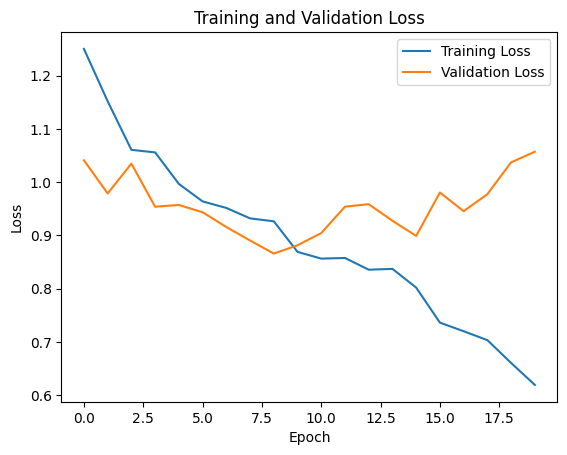

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (224, 224)  # Resize images to 224x224
batch_size = 32

# Create ImageDataGenerators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize images to [0, 1]
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Labels are one-hot encoded
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Labels are one-hot encoded
    shuffle=False
)

# Custom data generator to convert categorical labels to sparse labels
import numpy as np

def sparse_generator(data_generator):
    """Convert one-hot labels to sparse labels for compatibility with sparse_categorical_crossentropy."""
    for images, labels in data_generator:
        yield images, np.argmax(labels, axis=1)  # Convert one-hot to sparse

train_generator_sparse = sparse_generator(train_generator)
validation_generator_sparse = sparse_generator(validation_generator)

# Compile the model
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
cnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',  # Matches sparse labels
    metrics=['accuracy']
)

# Train the model
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

history = cnn_model.fit(
    train_generator_sparse,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=validation_generator_sparse,
    validation_steps=validation_steps,
    verbose=1
)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


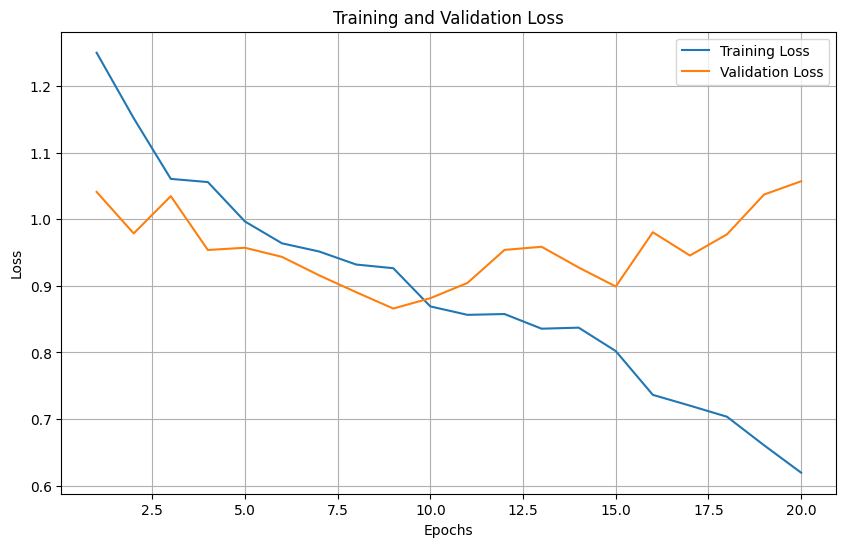

In [10]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Path to save the model
save_path = '/content/drive/My Drive/models/cnn_model_1.h5'

# Save the model
cnn_model.save(save_path)

# Confirm the model has been saved
print("Model saved successfully!")


Model saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model

# Path to the saved model
save_path = '/content/drive/My Drive/models/cnn_model_1.h5'

# Load the model
cnn_model = load_model(save_path)

# Confirm the model has been loaded
print("Model loaded successfully!")


Model loaded successfully!


### Evaluate the model

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Parameters

img_size = (224, 224)  # Replace with your model's expected input size
batch_size = 32  # Adjust batch size if needed

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling to preserve order
)


Found 1823 images belonging to 5 classes.


In [15]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

InvalidArgumentError: Graph execution error:

Detected at node Squeeze defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-14-643e1185ece0>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1920, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 961, in sparse_categorical_matches

Can not squeeze dim[1], expected a dimension of 1, got 5
	 [[{{node Squeeze}}]] [Op:__inference_test_function_25949]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = test_generator.classes
predictions = cnn_model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(report)


### Plot training and validation loss

In [ ]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Learning rates to experiment with
learning_rates = [0.0001, 0.01, 0.1]

# Dictionary to store training histories for each learning rate
histories = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # Build and compile the model with the given learning rate
    cnn_model = build_cnn(input_shape=(224, 224, 3), x1=32, m1=3, x2=64, m2=3, x3=128, x4=64, m3=3, d=0.5, num_classes=5)
    cnn_model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define image size and batch size
    img_size = (224, 224)  # Resize images to 150x150
    batch_size = 32

    # Create ImageDataGenerators for training, validation, and test sets
    train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images to [0, 1]
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Load data from directories
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',  # Use categorical since labels are one-hot encoded
        shuffle=True
    )

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # No shuffling for validation data
    )

    # Train the model and store history
    history = cnn_model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose=1
    )

    histories[lr] = history


# Plot training and validation loss
plt.figure(figsize=(12, 8))

for lr, history in histories.items():
    plt.plot(history.history['loss'], label=f'Train Loss (lr={lr})')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss (lr={lr})')

plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss for each learning rate in separate plots
for lr, history in histories.items():
    plt.figure(figsize=(12, 8))

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], linestyle='--', label='Val Loss')

    # Customize plot
    plt.title(f'Training and Validation Loss for Learning Rate {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


In [ ]:
import os

# Directory to save models
save_dir = "/content/drive/My Drive/models/saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

for lr, history in histories.items():
    # Filepath for each model
    model_path = os.path.join(save_dir, f"cnn_model_lr_{lr}.h5")

    # Save the model
    cnn_model.save(model_path)
    print(f"Model with learning rate {lr} saved to {model_path}")
